In [13]:
import json
import nltk
from nltk.tokenize import TweetTokenizer
from nltk.tokenize import sent_tokenize
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import string
import syllapy
from typing import List, Dict, Tuple

In [14]:
with open("../../JSON/the_old_bachelor.json", "r") as tob_file:
    tob = json.load(tob_file)
with open("../../JSON/the_double_dealer.json", "r") as tdd_file:
    tdd = json.load(tdd_file)
with open("../../JSON/love_for_love.json", "r") as lfl_file:
    lfl = json.load(lfl_file)
with open("../../JSON/the_way_of_the_world.json", "r") as twotw_file:
    twotw = json.load(twotw_file)

In [15]:
# Create seperate lists, grouping men and women based on the dramatis personae of each play
tob_men = ["heartwell", "bellmour", "vainlove", "sharper", "sir joseph", "captain bluffe", "fondlewife", "setter", "servant",]
tob_women = ["araminta", "belinda", "laetitia", "silvia", "lucy", "betty",]
tdd_men = ["maskwell", "lord touchwood", "mellefont", "careless", "lord froth", "brisk", "sir paul plyant",]
tdd_women = ["lady touchwood", "cynthia", "lady froth", "lady plyant",]
lfl_men = ["sir sampson legend", "valentine", "scandal", "tattle", "ben", "foresight", "jeremy", "trapland", "buckram",]
lfl_women = ["angelica", "mrs. foresight", "mrs. frail", "miss prue", "nurse", "jenny",]
twotw_men = ["fainall", "mirabell", "witwoud", "petulant", "sir willfull witwoud", "waitwell",]
twotw_women =["lady wishfort", "millamant", "mrs. marwood", "mrs. fainall", "foible", "mincing",]

In [16]:
def flesch_kincaid(text):
    # Tokenize the text into words and sentences
    t = TweetTokenizer()
    words = t.tokenize(text)
    sentences = sent_tokenize(text)

    # Remove punctuation from words list
    words = [word.lower() for word in words if word not in string.punctuation]

    # Calculate word count, return None if the count is less than 100
    word_count = len(words)
    if word_count < 100:
        return None, None

    # Calculate sentence count and syllable count
    sentence_count = len(sentences)
    syllable_count = 0
    for word in words:
        current_syllables = syllapy.count(word)
        if current_syllables:
            syllable_count += current_syllables

    # Apply Flesch-Kincaid Grade Level Formula
    grade_level = 0.39 * (word_count / sentence_count) + 11.8 * (syllable_count / word_count) - 15.59

    # Apply Flesch Reading-Ease Formula
    reading_ease = 206.835 - 1.015 * (word_count / sentence_count) - 84.6 * (syllable_count / word_count)

    return grade_level, reading_ease

In [17]:
# Store lines, spoken by each character in a character list, in a single string
def all_lines_str_dict(char_dict: Dict[str, Dict[str, List[str]]], char_list: List[str]):
    str_dict = {}
    for character in char_list:
        lines = ""
        if character not in char_dict:
            print(f"Unrecognised character: {character}")
            continue
        for act in char_dict[character]:
            if act == "alias":
                continue
            str = " ".join(char_dict[character][act])
            lines += " " + str
        str_dict[character] = lines.lstrip()
    return str_dict

In [18]:
tob_men_lines = all_lines_str_dict(tob, tob_men)
tob_women_lines = all_lines_str_dict(tob, tob_women)
tdd_men_lines = all_lines_str_dict(tdd, tdd_men)
tdd_women_lines = all_lines_str_dict(tdd, tdd_women)
lfl_men_lines = all_lines_str_dict(lfl, lfl_men)
lfl_women_lines = all_lines_str_dict(lfl, lfl_women)
twotw_men_lines = all_lines_str_dict(twotw, twotw_men)
twotw_women_lines = all_lines_str_dict(twotw, twotw_women)

In [19]:
# Get Grade level and Reading-Rase scores of all the str values in a dictionary
# And return two seperate dictionaries containing the scores
def get_scores(char_dict: Dict[str, str]):
    grade_level_scores = {}
    reading_ease_scores = {}
    for character in char_dict:
        grade_level, reading_ease = flesch_kincaid(char_dict[character])
        if grade_level and reading_ease:
            grade_level_scores[character] = round(grade_level, 2)
            reading_ease_scores[character] = round(reading_ease, 2)
    return grade_level_scores, reading_ease_scores

In [20]:
tob_men_gl_scores, tob_men_re_scores = get_scores(tob_men_lines)
tob_women_gl_scores, tob_women_re_scores = get_scores(tob_women_lines)
tdd_men_gl_scores, tdd_men_re_scores = get_scores(tdd_men_lines)
tdd_women_gl_scores, tdd_women_re_scores = get_scores(tdd_women_lines)
lfl_men_gl_scores, lfl_men_re_scores = get_scores(lfl_men_lines)
lfl_women_gl_scores, lfl_women_re_scores = get_scores(lfl_women_lines)
twotw_men_gl_scores, twotw_men_re_scores = get_scores(twotw_men_lines)
twotw_women_gl_scores, twotw_women_re_scores = get_scores(twotw_women_lines)

In [21]:
def create_combined_bar_graphs(
    dict1: Dict[str, float],
    dict2: Dict[str, float],
    filename: str,
    graph_titles: Tuple[str]=("Graph 1", "Graph 2"),
    combined_graph_title: str="Combined Bar Graphs",
    ):
    
    # Calculate the average of float values in each dictionary
    avg1 = sum(dict1.values()) / len(dict1)
    avg2 = sum(dict2.values()) / len(dict2)
    
    # Create subplots
    fig = make_subplots(rows=1, cols=2, subplot_titles=graph_titles)
    
    # Create bar graph for dict1
    fig.add_trace(go.Bar(
        x=list(dict1.keys()),
        y=list(dict1.values())),
        row=1,
        col=1
    )
    
    # Add threshold line for the average of dict1
    fig.add_trace(go.Scatter(
        x=list(dict1.keys()),
        y=[avg1] * len(dict1),
        mode="lines",
        name="Threshold",
        line=dict(color="black", dash="dash")),
        row=1,
        col=1
    )

    # Create bar graph for dict2
    fig.add_trace(go.Bar(
        x=list(dict2.keys()),
        y=list(dict2.values())),
        row=1,
        col=2
    )
    
    # Add threshold line for the average of dict2
    fig.add_trace(go.Scatter(
        x=list(dict2.keys()),
        y=[avg2] * len(dict2),
        mode="lines",
        name="Threshold",
        line=dict(color="black", dash="dash")),
        row=1,
        col=2
    )


    # Update layout
    fig.update_layout(
        title=combined_graph_title,
        showlegend=False,
        dragmode="pan",
    )

    config = {"responsive": True}
    fig.show(config=config)
    fig.write_html(f"../../data-visualisation/flesch-kincaid/bar-graphs/{filename}.html")

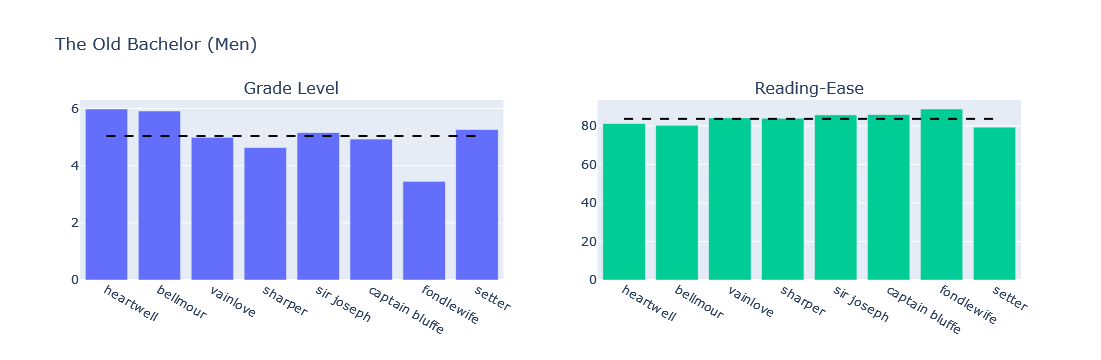

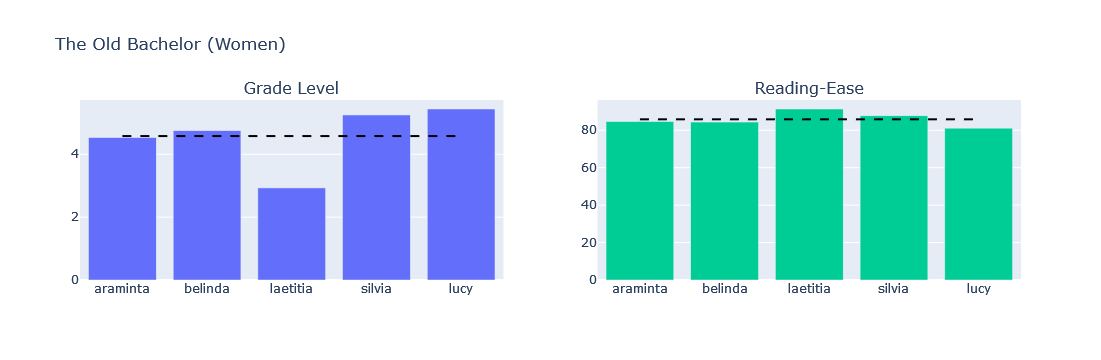

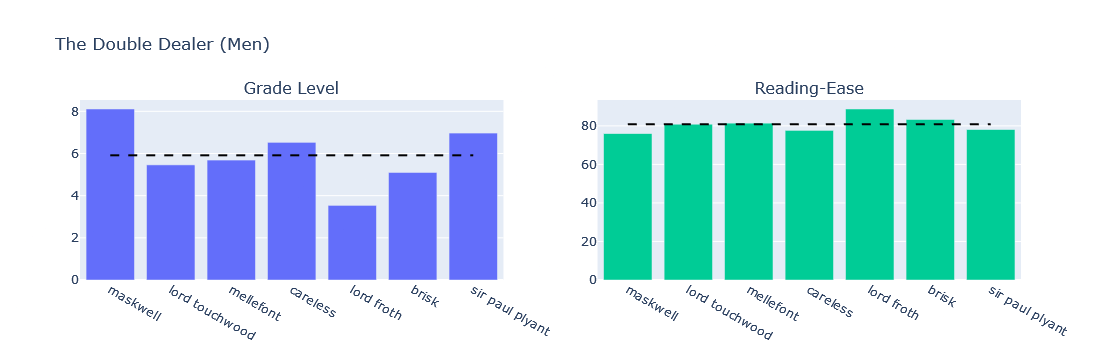

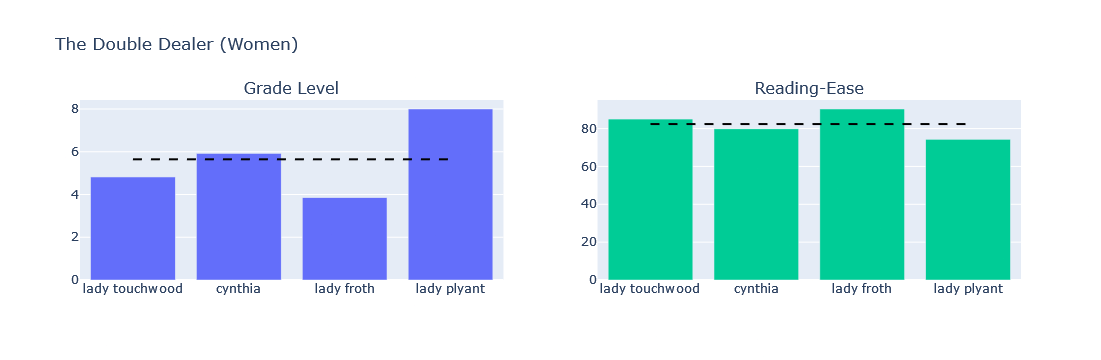

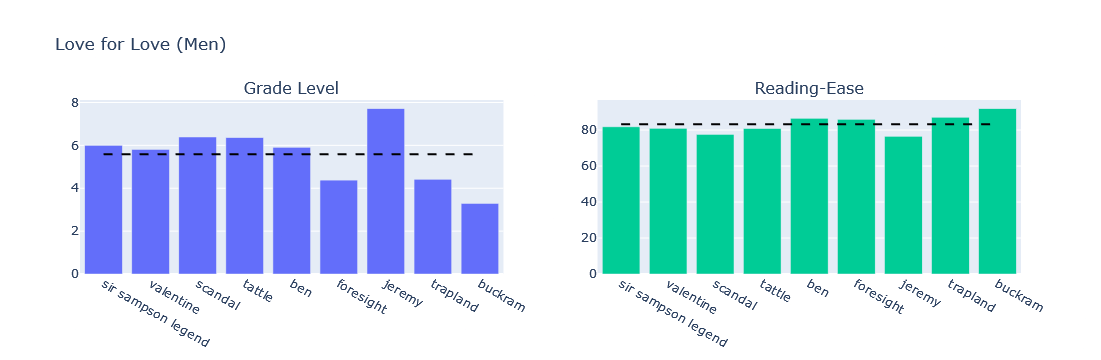

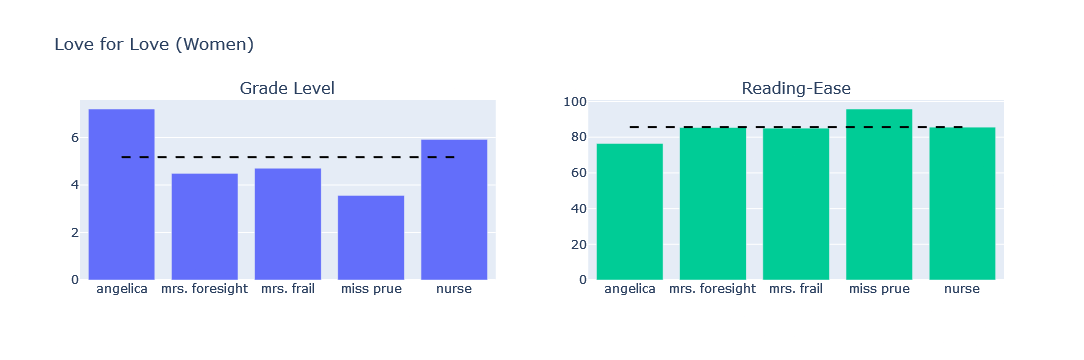

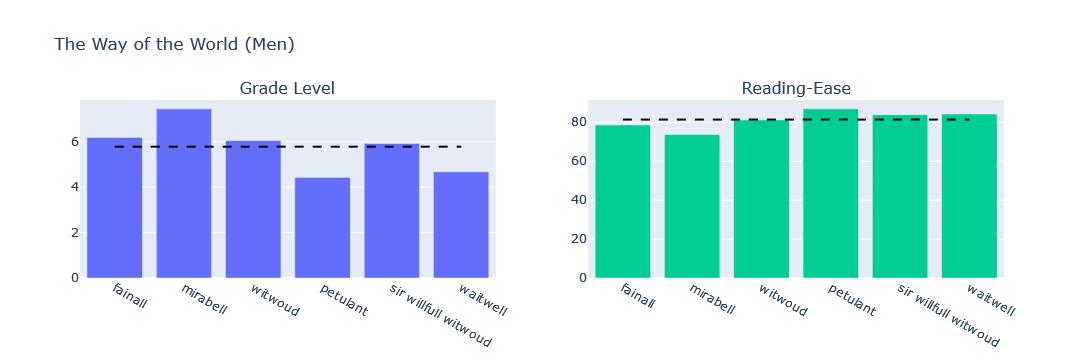

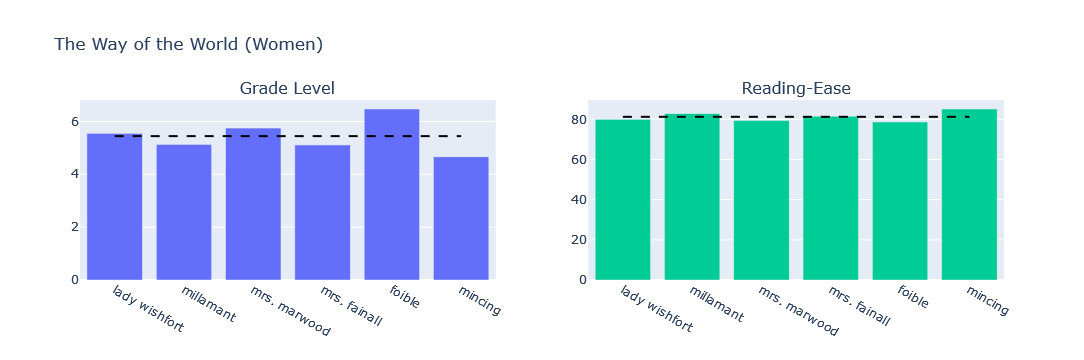

In [22]:
create_combined_bar_graphs(
    tob_men_gl_scores,
    tob_men_re_scores,
    filename="tob_men_flesch_kincaid_bar",
    graph_titles=("Grade Level", "Reading-Ease"),
    combined_graph_title="The Old Bachelor (Men)"
)

create_combined_bar_graphs(
    tob_women_gl_scores,
    tob_women_re_scores,
    filename="tob_women_flesch_kincaid_bar",
    graph_titles=("Grade Level", "Reading-Ease"),
    combined_graph_title="The Old Bachelor (Women)"
)

create_combined_bar_graphs(
    tdd_men_gl_scores,
    tdd_men_re_scores,
    filename="tdd_men_flesch_kincaid_bar",
    graph_titles=("Grade Level", "Reading-Ease"),
    combined_graph_title="The Double Dealer (Men)"
)

create_combined_bar_graphs(
    tdd_women_gl_scores,
    tdd_women_re_scores,
    filename="tdd_women_flesch_kincaid_bar",
    graph_titles=("Grade Level", "Reading-Ease"),
    combined_graph_title="The Double Dealer (Women)"
)

create_combined_bar_graphs(
    lfl_men_gl_scores,
    lfl_men_re_scores,
    filename="lfl_men_flesch_kincaid_bar",
    graph_titles=("Grade Level", "Reading-Ease"),
    combined_graph_title="Love for Love (Men)"
)

create_combined_bar_graphs(
    lfl_women_gl_scores,
    lfl_women_re_scores,
    filename="lfl_women_flesch_kincaid_bar",
    graph_titles=("Grade Level", "Reading-Ease"),
    combined_graph_title="Love for Love (Women)"
)

create_combined_bar_graphs(
    twotw_men_gl_scores,
    twotw_men_re_scores,
    filename="twotw_men_flesch_kincaid_bar",
    graph_titles=("Grade Level", "Reading-Ease"),
    combined_graph_title="The Way of the World (Men)"
)

create_combined_bar_graphs(
    twotw_women_gl_scores,
    twotw_women_re_scores,
    filename="twotw_women_flesch_kincaid_bar",
    graph_titles=("Grade Level", "Reading-Ease"),
    combined_graph_title="The Way of the World (Women)"
)

In [23]:
def create_scatter_plot(dict1: Dict[str, float], dict2: Dict[str, float], filename: str, title: str="Scatter Plot"):
    # Convert keys in dictionaries to title case
    dict1 = {key.title(): value for key, value in dict1.items()}
    dict2 = {key.title(): value for key, value in dict2.items()}
    
    # Convert dictionaries to lists of tuples
    data1 = list(dict1.items())
    data2 = list(dict2.items())

    # Specify key and value names
    key = "Character Name"
    value1 = "Flesch-Kincaid Grade Level"
    value2 = "Flesch Reading-Ease Score"
    
    # Create DataFrame for Plotly Express
    df1 = pd.DataFrame(data1, columns=[key, value1])
    df2 = pd.DataFrame(data2, columns=[key, value2])
    
    # Merge dataframes on key column
    df = pd.merge(df1, df2, on=key, how="inner")

    # Create scatter plot
    fig = px.scatter(df, x=value1, y=value2, title=title, color=key)
    
    # Show and save plot
    config = {"responsive": True}
    fig.show(config=config)
    fig.write_html(f"../../data-visualisation/flesch-kincaid/scatter-plots/{filename}.html")

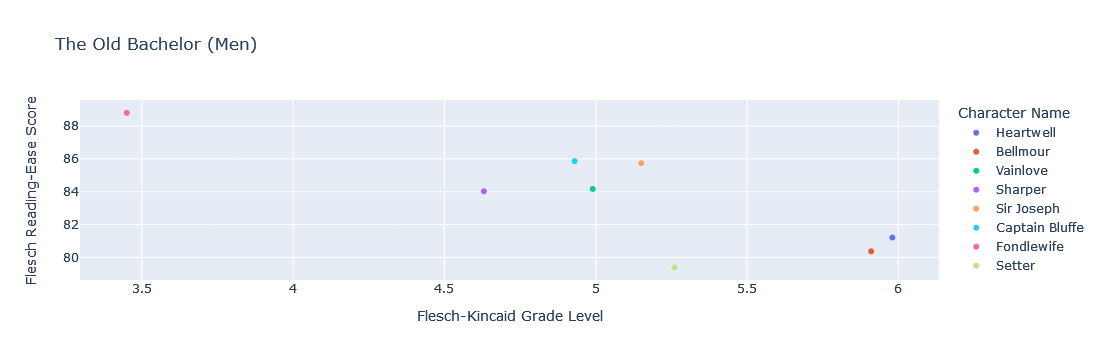

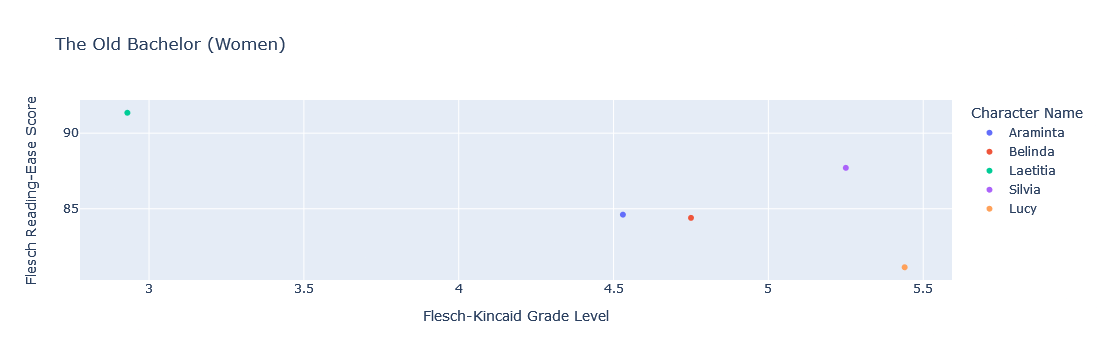

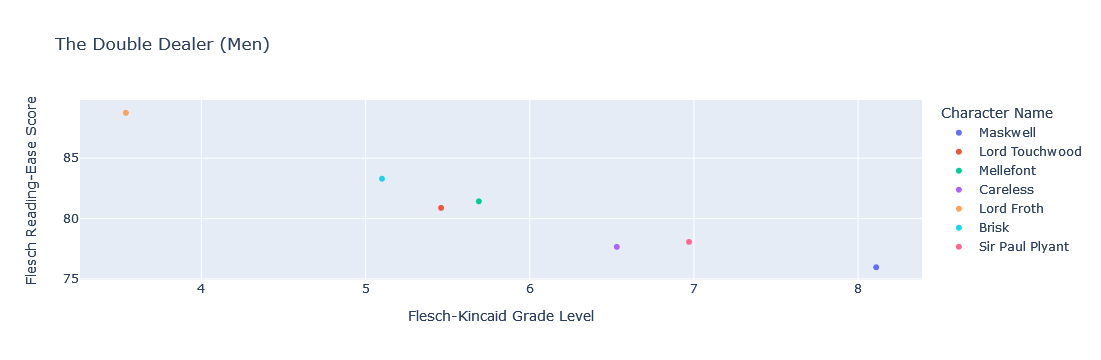

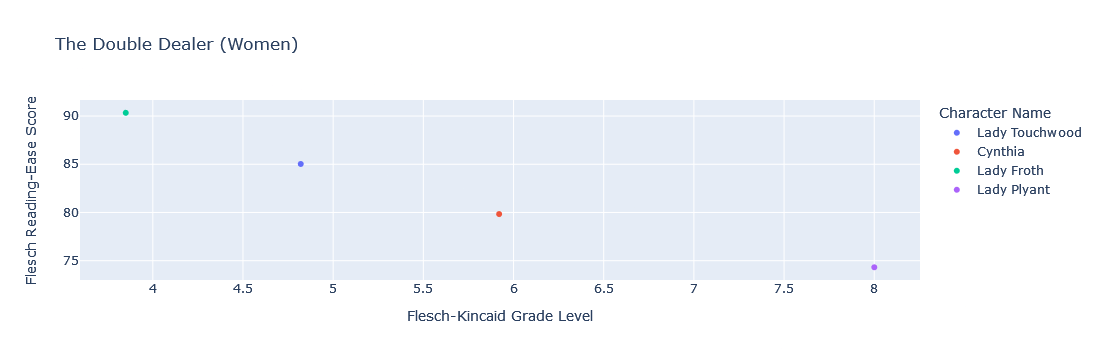

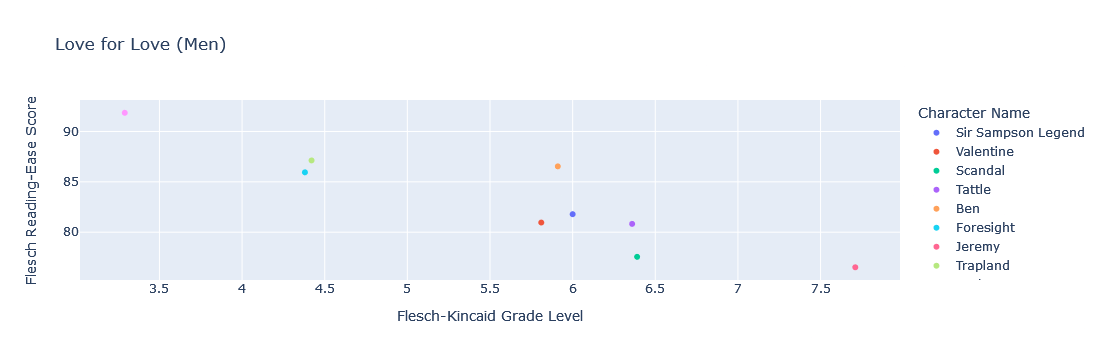

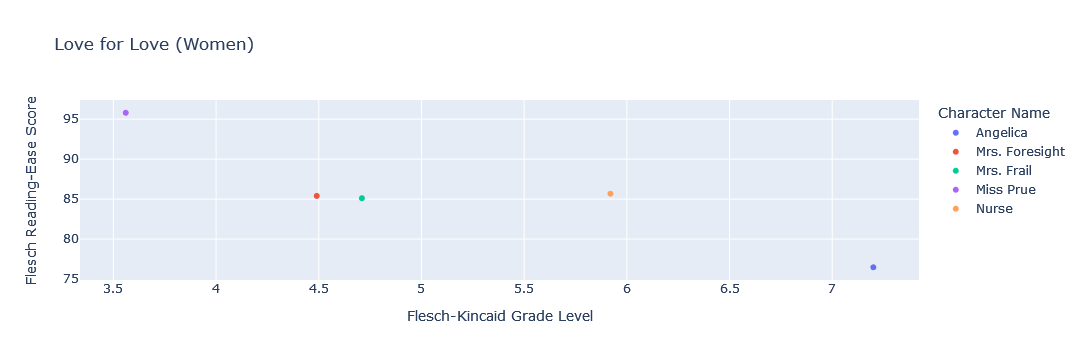

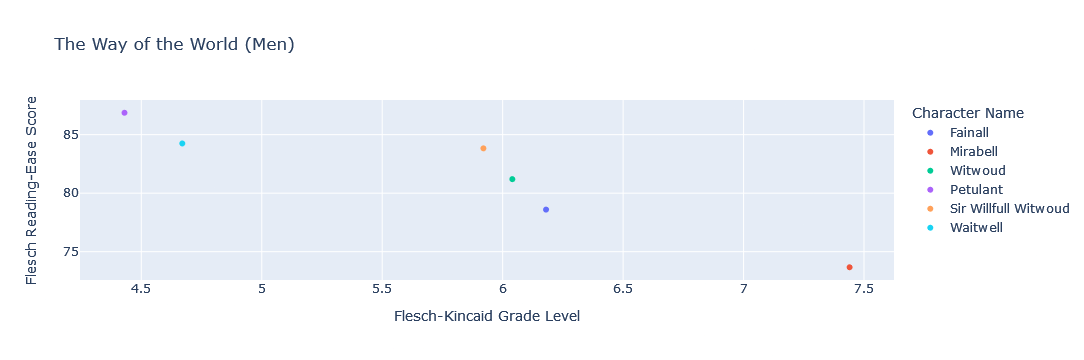

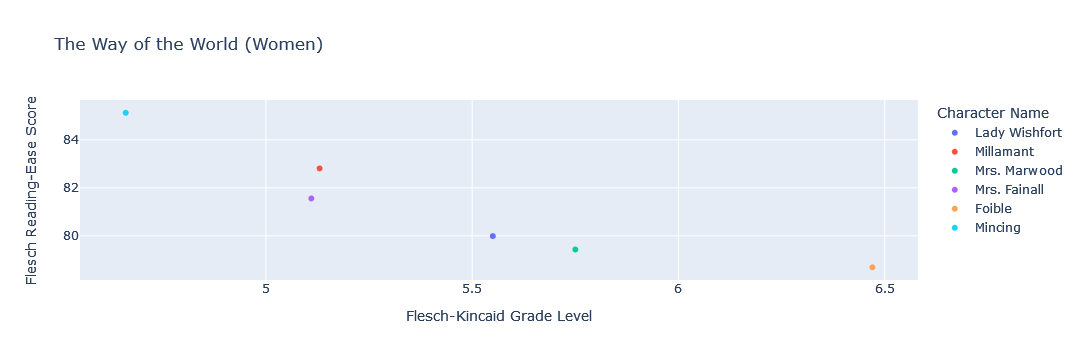

In [24]:
create_scatter_plot(tob_men_gl_scores, tob_men_re_scores, filename="tob_men_flesch_kincaid_scatter", title="The Old Bachelor (Men)")
create_scatter_plot(tob_women_gl_scores, tob_women_re_scores, filename="tob_women_flesch_kincaid_scatter", title="The Old Bachelor (Women)")
create_scatter_plot(tdd_men_gl_scores, tdd_men_re_scores, filename="tdd_men_flesch_kincaid_scatter", title="The Double Dealer (Men)")
create_scatter_plot(tdd_women_gl_scores, tdd_women_re_scores, filename="tdd_women_flesch_kincaid_scatter", title="The Double Dealer (Women)")
create_scatter_plot(lfl_men_gl_scores, lfl_men_re_scores, filename="lfl_men_flesch_kincaid_scatter", title="Love for Love (Men)")
create_scatter_plot(lfl_women_gl_scores, lfl_women_re_scores, filename="lfl_women_flesch_kincaid_scatter", title="Love for Love (Women)")
create_scatter_plot(twotw_men_gl_scores, twotw_men_re_scores, filename="twotw_men_flesch_kincaid_scatter", title="The Way of the World (Men)")
create_scatter_plot(twotw_women_gl_scores, twotw_women_re_scores, filename="twotw_women_flesch_kincaid_scatter", title="The Way of the World (Women)")